In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
""" I. Bloch
"""


#%% SECTION 1 inclusion of packages 


import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
# necessite scikit-image 
from skimage import io as skio
from skimage.filters import gaussian
from skimage.segmentation import active_contour
from skimage import img_as_float
from skimage.segmentation import chan_vese
from skimage.segmentation import checkerboard_level_set
from skimage.segmentation import disk_level_set
import itertools

TP 2-  DEFORMABLE MODELS

1.1 Parameters\
we applied the segmentation method based on parametric active contours by varying its parameters in order to understand better their role and effect on the segmentation result

Closed contour initialization

In [353]:
def gris_depuis_couleur(im):
    """ Transforme une image couleur en image a niveaux de gris"""
    return im[:,:,:3].sum(axis=2)/3

In [354]:
#to segment an image
#closed contour
def segm_active_contours_close(image, init, sigma, alpha, beta, w_edge, gamma, ax=None):
    im = skio.imread(image)
    if len(im.shape)>2 and im.shape[2]==3:
        im=gris_depuis_couleur(im)
    
    #First initialization (inside the object)
    if init=="init_in":
        s = np.linspace(0, 2 * np.pi, 100)
        r = 140 + 15 * np.sin(s)
        c = 130 + 15 * np.cos(s)
        init = np.array([r, c]).T
    elif init=="init_out":
    #Second initialization (outside the object)
        n=im.shape[0]
        r = 0.95 * n / 2
        p = 128
        theta = np.linspace(0, 2 * np.pi, p, endpoint=False)
        x_center = n / 2
        y_center = n / 2 
        x = x_center + r * np.cos(theta)
        y = y_center + r * np.sin(theta)
        init = np.array([x, y]).T

    snake = active_contour(gaussian(im, sigma), init, alpha, beta, w_edge, gamma)

    if ax is None:
        fig, ax = plt.subplots(figsize=(7, 7))
        plt.title(f"sigma={sigma}, alpha={alpha},\n beta={beta}, w_edge={w_edge},\n gamma={gamma}")
    
    ax.imshow(im, cmap=plt.cm.gray)
    ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
    ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
    ax.set_xticks([]), ax.set_yticks([])
    ax.axis([0, im.shape[1], im.shape[0], 0])

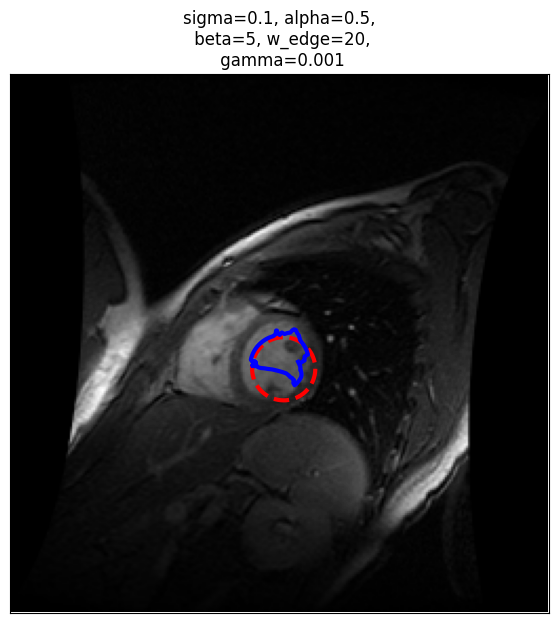

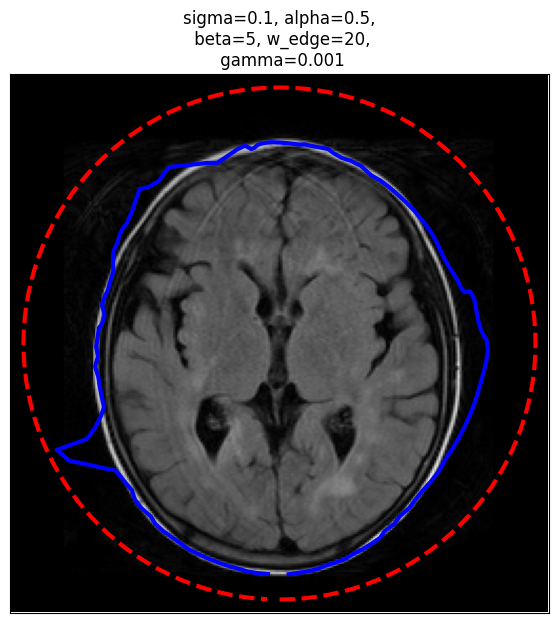

In [355]:
segm_active_contours_close("images/coeurIRM.bmp", "init_in", 0.1 , 0.5, 5, 20, 0.001)
segm_active_contours_close("images/brain2.bmp", "init_out", 0.1, 0.5, 5, 20, 0.001 )

In [357]:
#to segment an image by changing the values of all the parameters
#closed contour
import itertools

def segm_active_contours_close_varParam(image, init, sigmas, alphas, betas, w_edges, gammas):
    num_sigmas = len(sigmas)
    num_alphas = len(alphas)
    num_betas = len(betas)
    num_w_edges = len(w_edges)
    num_gammas = len(gammas)

    num_comb = num_sigmas * num_alphas * num_betas * num_w_edges * num_gammas

    fig, axes = plt.subplots(1, num_comb, figsize=(12, 3))
    in_sub=0
    for sigma, alpha, beta, w_edge, gamma in itertools.product(sigmas, alphas, betas, w_edges, gammas):
        
        ax = axes[in_sub]
        snake = segm_active_contours_close(image, init, sigma, alpha, beta, w_edge, gamma, ax)
        ax.set_title(f"sigma={sigma}, alpha={alpha},\n beta={beta}, w_edge={w_edge},\n gamma={gamma}")
        in_sub += 1

    plt.tight_layout()
    plt.show()

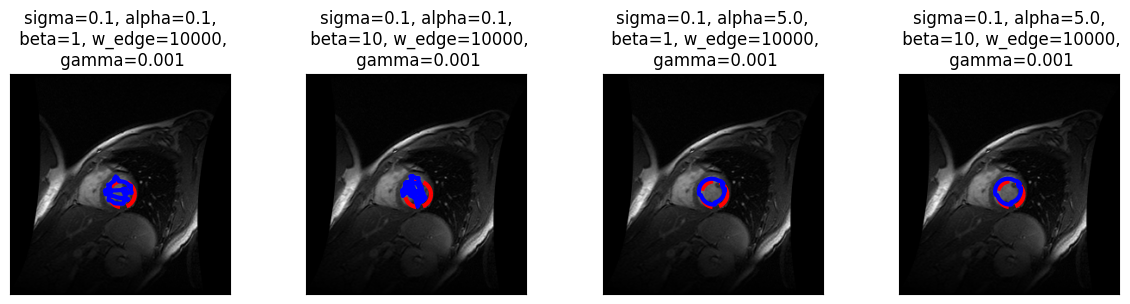

In [358]:
segm_active_contours_close_varParam("images/coeurIRM.bmp", "init_in", [0.1], [0.1, 5.0], [1, 10], [10000], [0.001])

Open contour initialization

In [359]:
#to segment an image
#open contour
def segm_active_contours_open(image, sigma, alpha, beta, w_line, w_edge, gamma, ax=None):
    im = skio.imread(image)
    if len(im.shape)>2 and im.shape[2]==3:
        im=gris_depuis_couleur(im)
        
    r = np.linspace(20, 80, 100)
    c = np.linspace(20, 100, 100)
    init = np.array([r, c]).T

    snake = active_contour(gaussian(im, sigma), init, boundary_condition='fixed',
                        alpha=alpha, beta=beta, w_line=w_line, w_edge=w_edge, gamma=gamma)

    if ax is None:
        fig, ax = plt.subplots(figsize=(9, 5))
        plt.title(f"sigma={sigma}, alpha={alpha},\n beta={beta}, w_line={w_line}, w_edge={w_edge},\n gamma={gamma}")
    
    ax.imshow(im, cmap=plt.cm.gray)
    ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
    ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
    ax.set_xticks([]), ax.set_yticks([])
    ax.axis([0, im.shape[1], im.shape[0], 0])

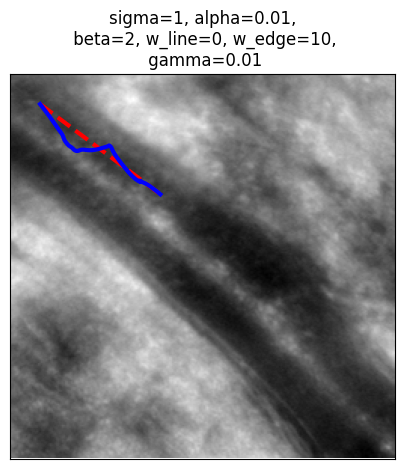

In [360]:
segm_active_contours_open("images/retineOA.bmp", 1, 0.01, 2, 0, 10, 0.01)

In [375]:
#to segment an image by changing the values of all the parameters
#open contour

def segm_active_contours_open_varParam(image, sigmas, alphas, betas, w_lines, w_edges, gammas):
    num_sigmas = len(sigmas)
    num_alphas = len(alphas)
    num_betas = len(betas)
    num_wLines= len(w_lines)
    num_w_edges = len(w_edges)
    num_gammas = len(gammas)

    num_comb = num_sigmas * num_alphas * num_betas * num_wLines * num_w_edges * num_gammas
    cv
    fig, axes = plt.subplots(1, num_comb, figsize=(12, 3))
    in_sub=0
    for sigma, alpha, beta, w_line, w_edge, gamma in itertools.product(sigmas, alphas, betas, w_lines, w_edges, gammas):
        
        ax = axes[in_sub]
        segm_active_contours_open(image, sigma, alpha, beta, w_line,  w_edge, gamma, ax)
        ax.set_title(f"sigma={sigma}, alpha={alpha},\n beta={beta}, w_line={w_line}, w_edge={w_edge},\n gamma={gamma}")
        in_sub += 1

    plt.tight_layout()
    plt.show()

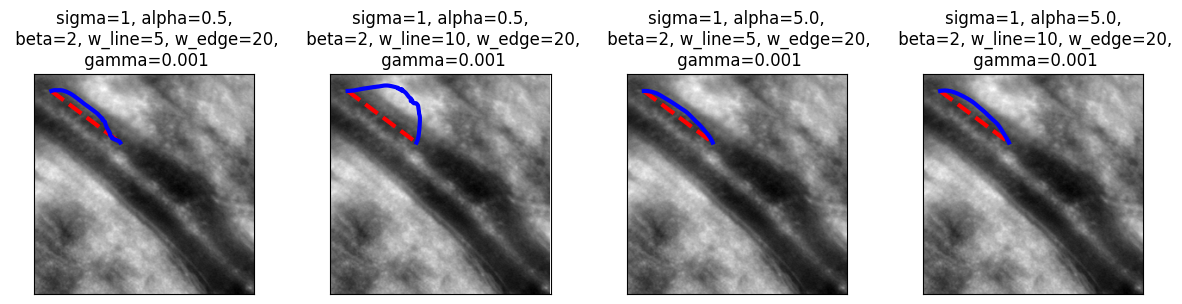

In [376]:
#default parameters if not given sigma=0.1, alpha=0.5, beta=5, w_edge=20, gamma=0.001
(def_sigma, def_alpha, def_beta, def_wline, def_wedge, def_gamma)=([1], [0.01], [2], [0], [10], [0.01])
segm_active_contours_open_varParam("images/retineOA.bmp", [1], [0.5, 5.0], [2], [5, 10], [20], [0.001])

1.2 Parameters\
we applied the segmentation method based on implicit representation using level sets by varying its parameters in order to understand better their role and effect on the segmentation result

In [369]:
#to segment an image
def segm_level_set(image, init, mu, lambda1, lambda2, tol, max_num_iter, dt, ax=None):
    im=skio.imread(image)
    im_float = img_as_float(im)
    #print(im.shape)
    #print(im_float.shape)
    if len(im_float.shape)>2 and im_float.shape[2]==3:
        im_float=gris_depuis_couleur(im_float)
    if init=="disk":
        init_ls = disk_level_set (im_float.shape, center=(120,130), radius=10)
    if init=="checkboard":
        init_ls = checkerboard_level_set(im_float.shape, 6)
    if init=="multi disk":
        circleNum = 8
        circleRadius = im_float.shape[0] / (3*circleNum)
        circleStep0 = im_float.shape[0]/(circleNum+1)
        circleStep1 = im_float.shape[1]/(circleNum+1)
        init_ls = np.zeros(im_float.shape)
        for i in range(circleNum):
            for j in range(circleNum):
                init_ls = init_ls + disk_level_set (im_float.shape, 
                                                    center=((i+1)*circleStep0, (j+1)*circleStep1), radius=circleRadius)
    cv = chan_vese(im_float, mu, lambda1, lambda2, tol, max_num_iter,
                dt, init_level_set=init_ls, extended_output=True)

    
    fig, axes = plt.subplots(2, 2, figsize=(8, 8))
    ax = axes.flatten()

    ax[0].imshow(im_float, cmap="gray")
    ax[0].set_axis_off()
    ax[0].set_title("Original im_float", fontsize=12)

    ax[1].imshow(cv[0], cmap="gray")
    ax[1].set_axis_off()
    title = "Chan-Vese segmentation - {} iterations".format(len(cv[2]))
    ax[1].set_title(title, fontsize=12)

    ax[2].imshow(cv[1], cmap="gray")
    ax[2].set_axis_off()
    ax[2].set_title("Final Level Set", fontsize=12)

    ax[3].plot(cv[2])
    ax[3].set_title("Evolution of energy over iterations", fontsize=12)

    fig.tight_layout()
    return cv

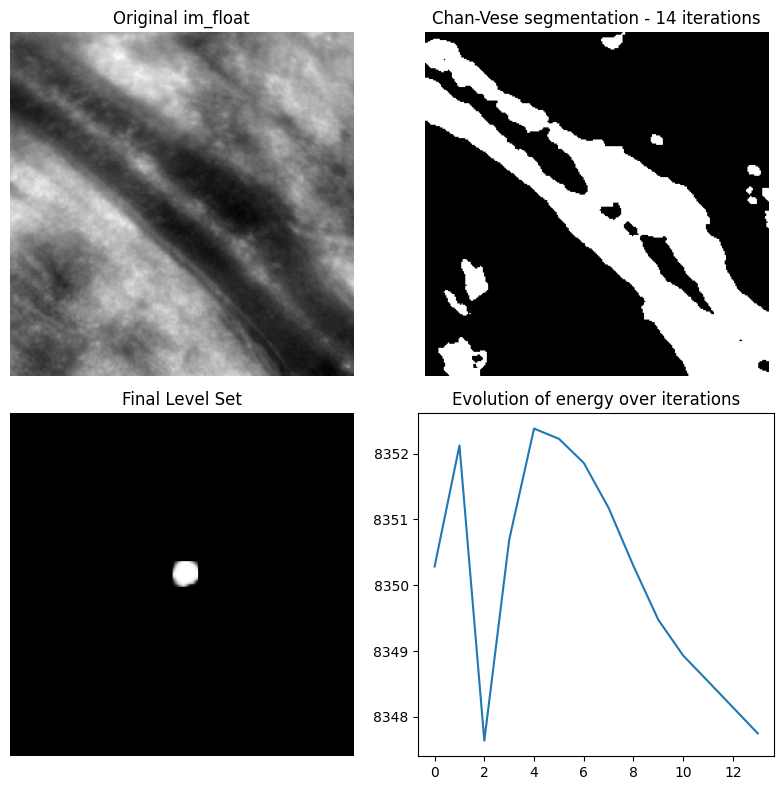

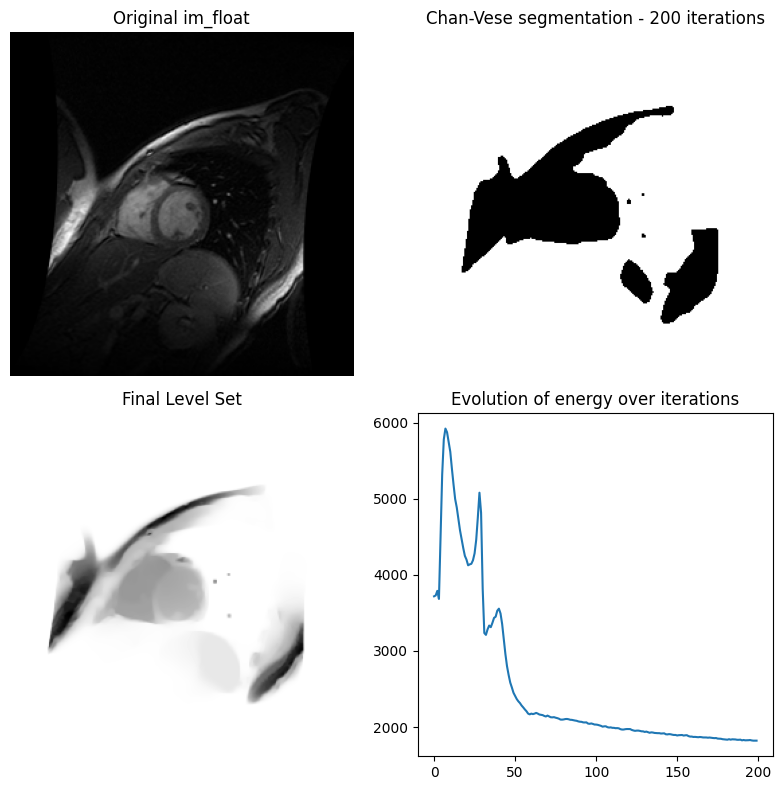

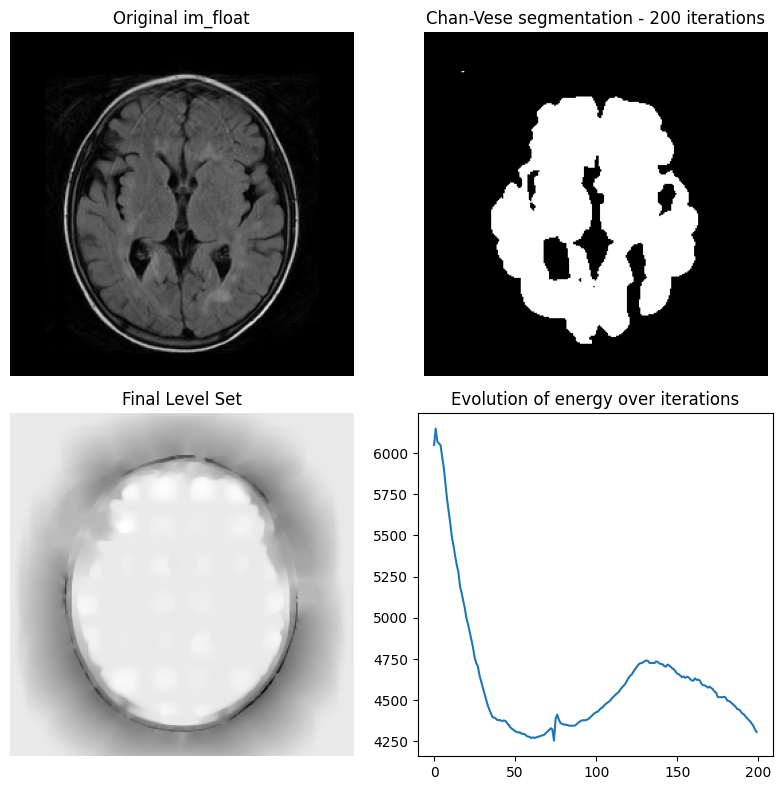

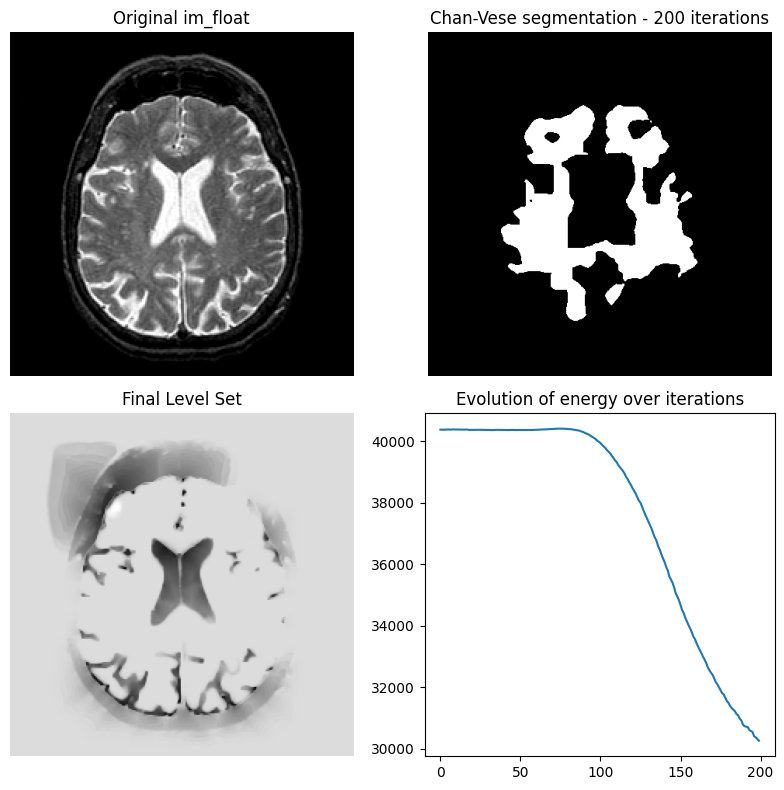

In [370]:
cv_retine=segm_level_set("images/retineOA.bmp", "disk", 0.25, 5, 1, 1e-3, 200, 0.5)
cv_coeur=segm_level_set("images/coeurIRM.bmp", "checkboard", 0.25, 5, 1, 1e-3, 200, 0.5)
cv_brain2=segm_level_set("images/brain2.bmp", "multi disk", 0.25, 5, 1, 1e-3, 200, 0.5)
cv_brain=segm_level_set("images/brain.bmp", "disk", 0.25, 5, 1, 1e-3, 200, 0.5)

In [371]:
#to segment an image varying the values of the parameters
def segm_level_set_varPar(image, inits, mus, lambda1s, lambda2s, tols, max_num_iters, dts):
    num_inits = len(inits)
    num_mus = len(mus)
    num_lambda1s = len(lambda1s)
    num_lambda2s= len(lambda2s)
    num_tols = len(tols)
    num_max_num_iters = len(max_num_iters)
    num_dts = len(dts)

    num_comb = num_inits * num_mus * num_lambda1s * num_lambda2s * num_tols *  num_max_num_iters * num_dts

    fig_ext, axes_ext = plt.subplots(1, num_comb, figsize=(12, 3))
    in_sub=0
    for init, mu, lambda1, lambda2, tol, max_num_iter, dt in itertools.product(inits, mus, lambda1s, lambda2s, tols, max_num_iters, dts):
        
        ax_ext = axes_ext[in_sub]
        cv = segm_level_set(image, init, mu, lambda1, lambda2, tol, max_num_iter, dt, ax)
        ax_ext.imshow(cv[0], cmap="gray")
        ax_ext.set_axis_off()
        title = f"init={init}, mu={mu},\nlambda1={lambda1}, lambda2={lambda2}, tol={tol},\nmax_num_iter={max_num_iter}, dt={dt}"
        ax_ext.set_title(title, fontsize=12)
        in_sub += 1

    plt.tight_layout()
    plt.show()

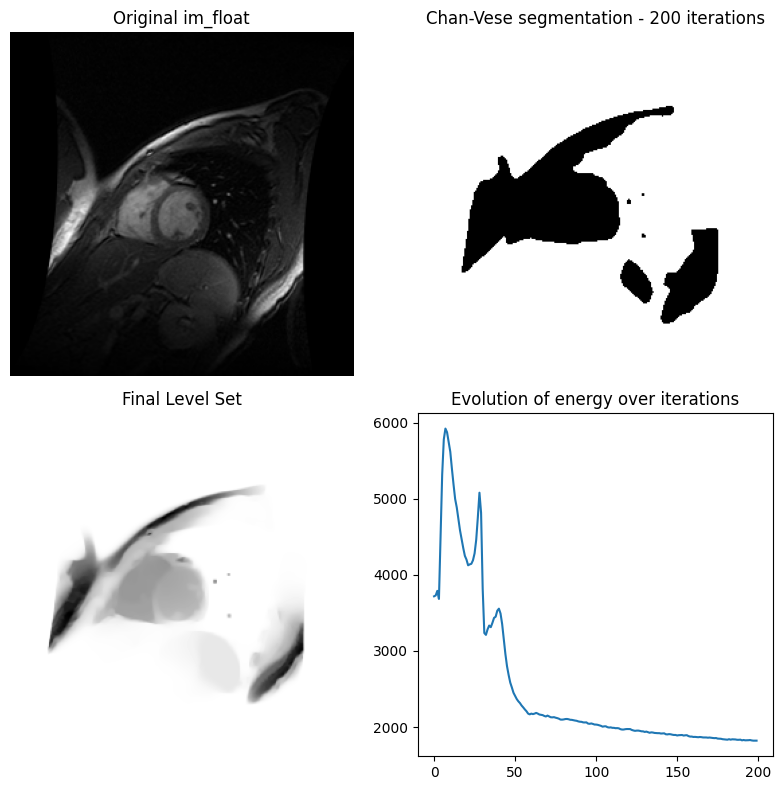

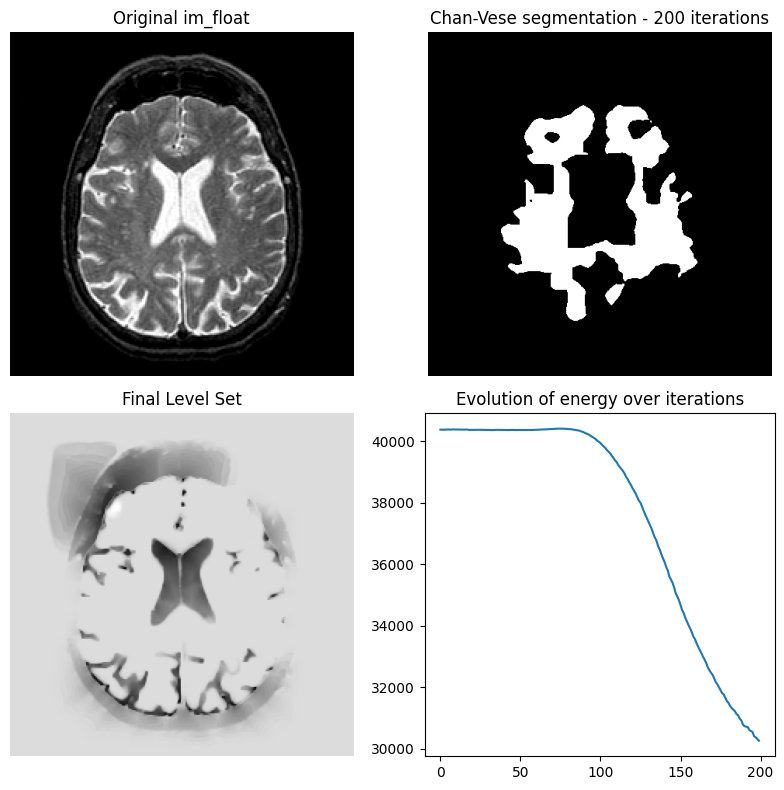

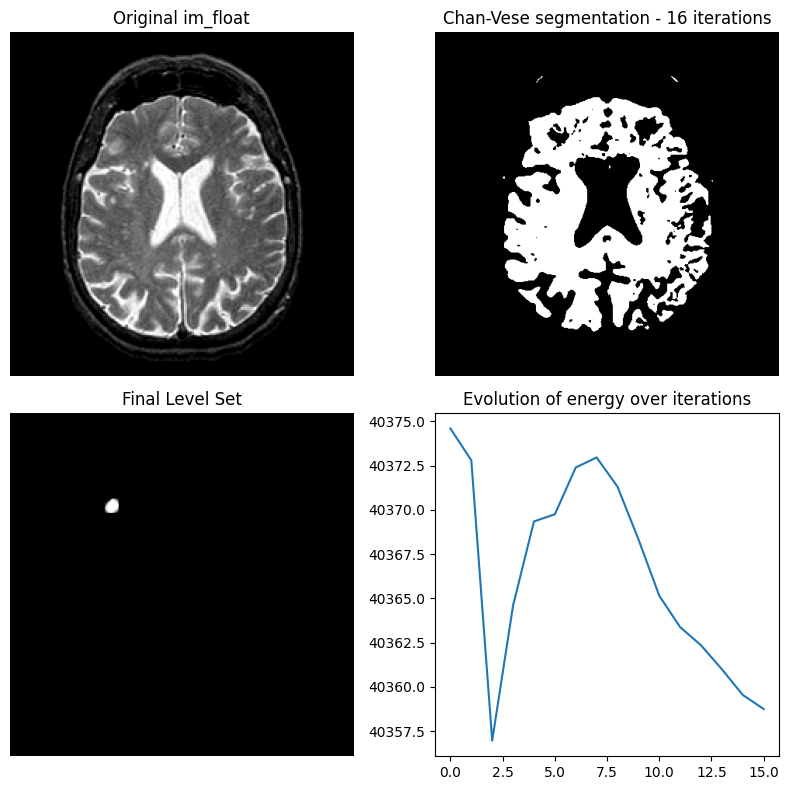

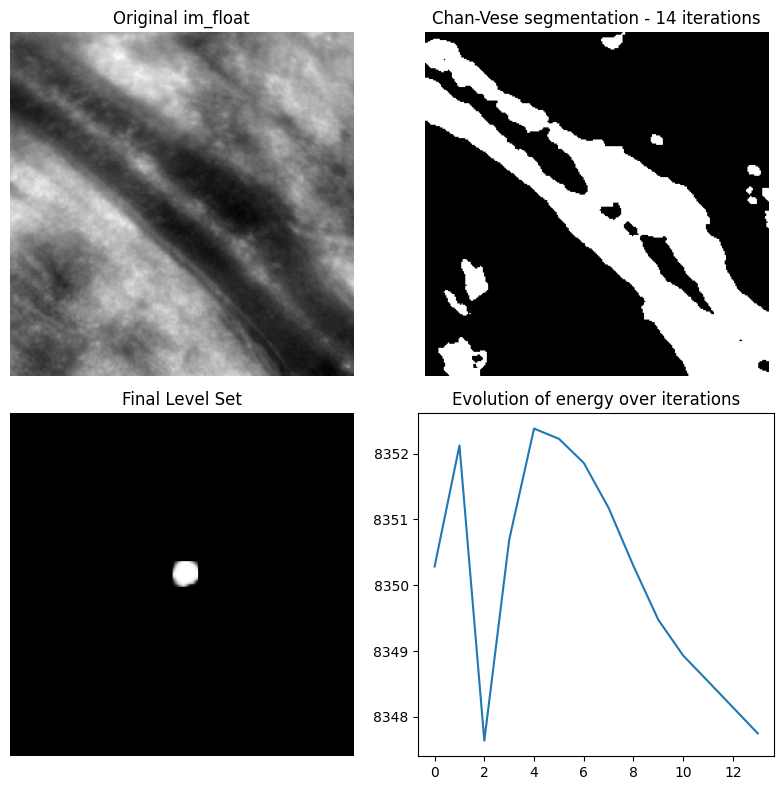

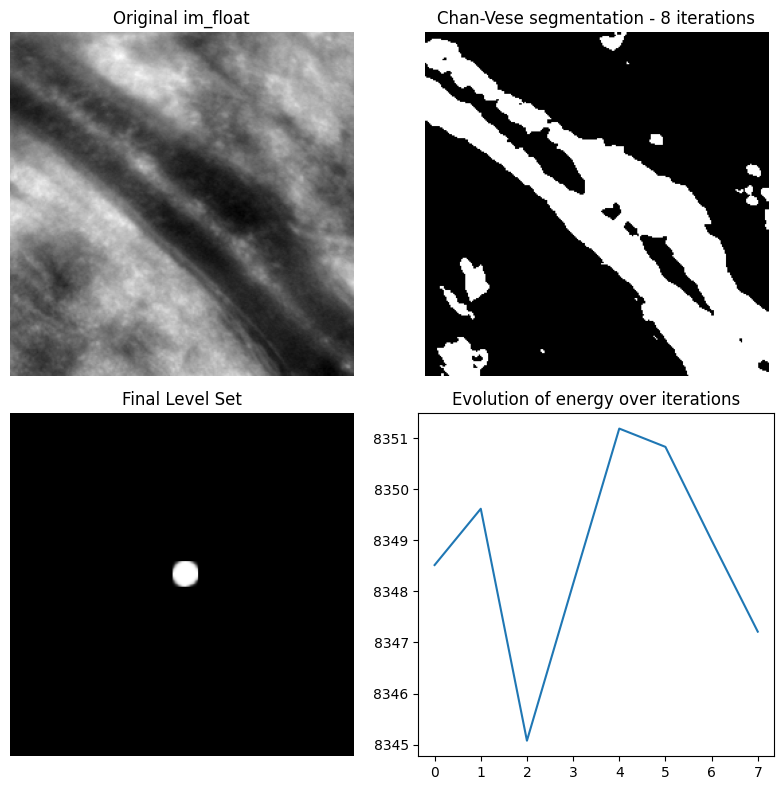

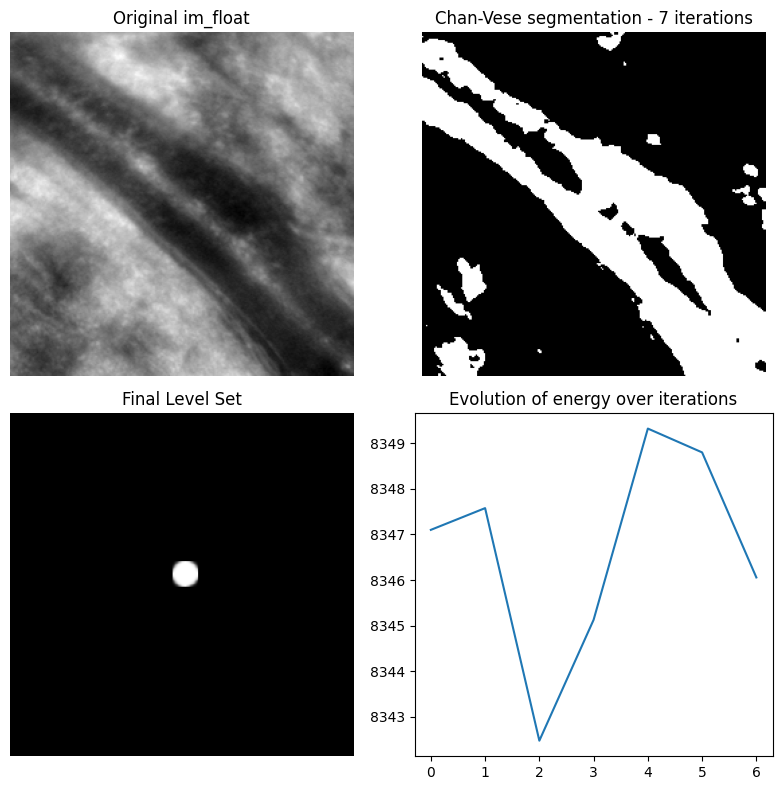

In [377]:
(def_init, def_mu, def_lambda1, def_lambda2, def_tol, def_max_num_iter, def_dt)= (["disk"], [0.25], [5], [1], [1e-3], [200], [0.5])
segm_level_set_varPar("images/coeurIRM.bmp", ["checkboard"], [0.25, 0.5, 0.7], [5], [1], [1e-3], [200], [0.5])
segm_level_set_varPar("images/brain.bmp", ["disk"], [0.25, 0.5, 0.7], [5], [1], [1e-3], [200], [0.5])
segm_level_set_varPar("images/retineOA.bmp", ["disk"], [0.25, 0.5, 0.7], [5], [1], [1e-3], [200], [0.5])

2.1 Segmentation\
Segmentation of image "brain2.bmp" with active contours method

In [ ]:
#default parameters
(def_sigma, def_alpha, def_beta, def_wedge, def_gamma)=([0.1], [0.1], [0.5], [50], [0.001])
print("Testing sigma")
segm_active_contours_close_varParam("images/brain2.bmp", [0.1, 1], [0.1], [0.5], [50], [0.001])# increase of sigma
print("Testing alpha")
segm_active_contours_close_varParam("images/brain2.bmp", [1], [0.1, 1], [0.5], [50], [0.001])# increase of alpha
print("Testing beta")
segm_active_contours_close_varParam("images/brain2.bmp", [1], [1], [0.5, 5], [50], [0.001])# increase of beta
print("Testing w_edge")
segm_active_contours_close_varParam("images/brain2.bmp", [1], [1], [5], [20, 50], [0.001])# decreasing of the gradient information


segm_active_contours_close("images/brain2.bmp", 1, 1, 5, 20, 0.001)#final

2.2 Segmentation\
Segmentation of image "dog.png" with level set method

In [345]:
image="images/dog_square.png"
im=skio.imread(image) #, as_gray=True)

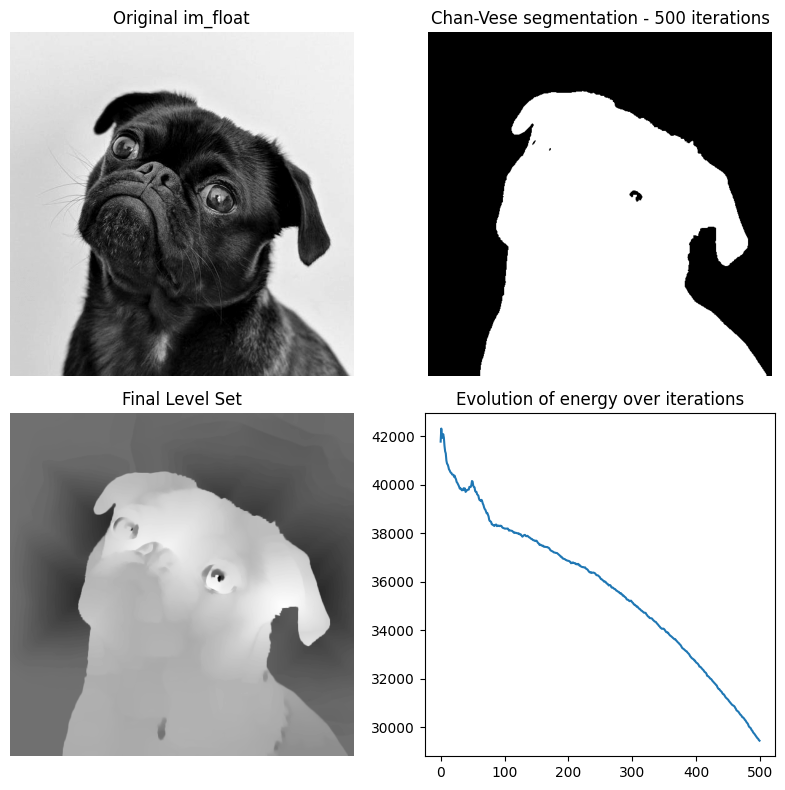

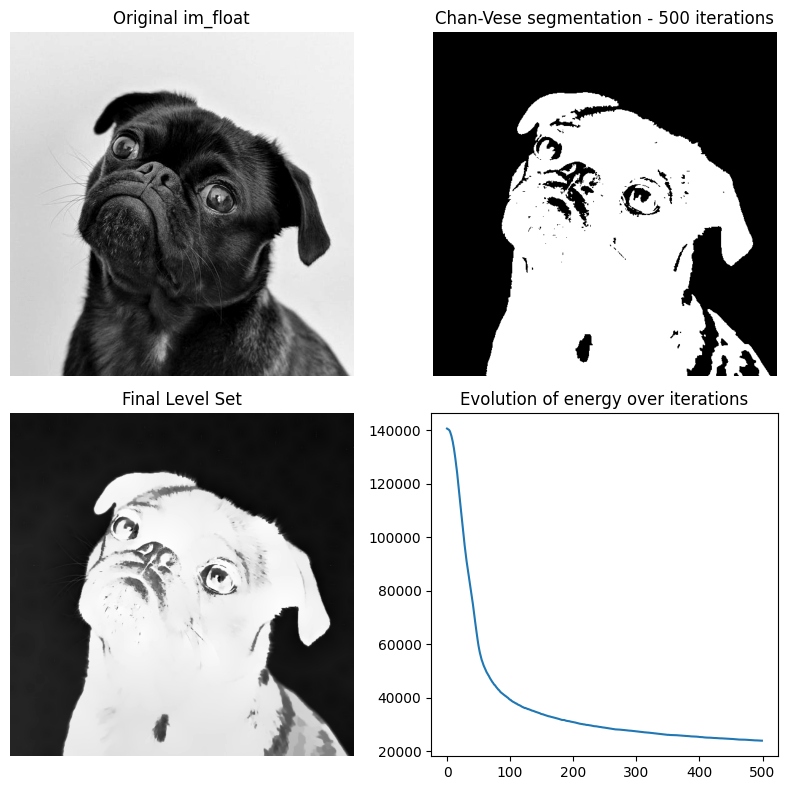

In [346]:
# Starting from official values: 
cv_dog = segm_level_set(image, init="multi disk", mu=0.25, lambda1=1, lambda2=1.0, tol=0.001, max_num_iter=500, dt=0.5)
# Found BEST OVERALL VALUES: 
cv_dog = segm_level_set(image, init="multi disk", mu=0.1, lambda1=5, lambda2=1, tol=0.001, max_num_iter=500, dt=0.5)

Change lambda1s


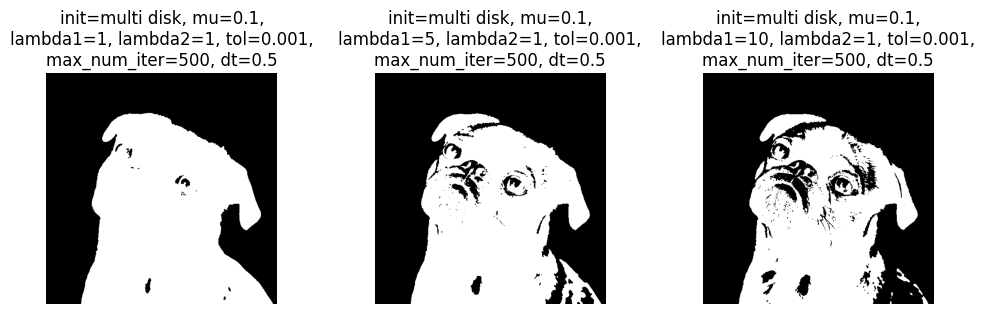

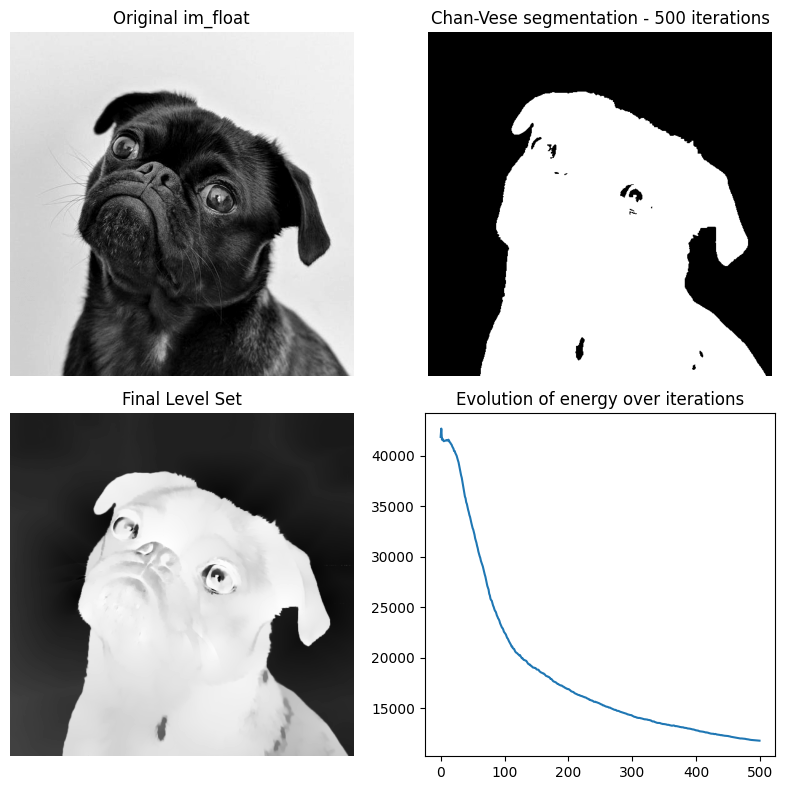

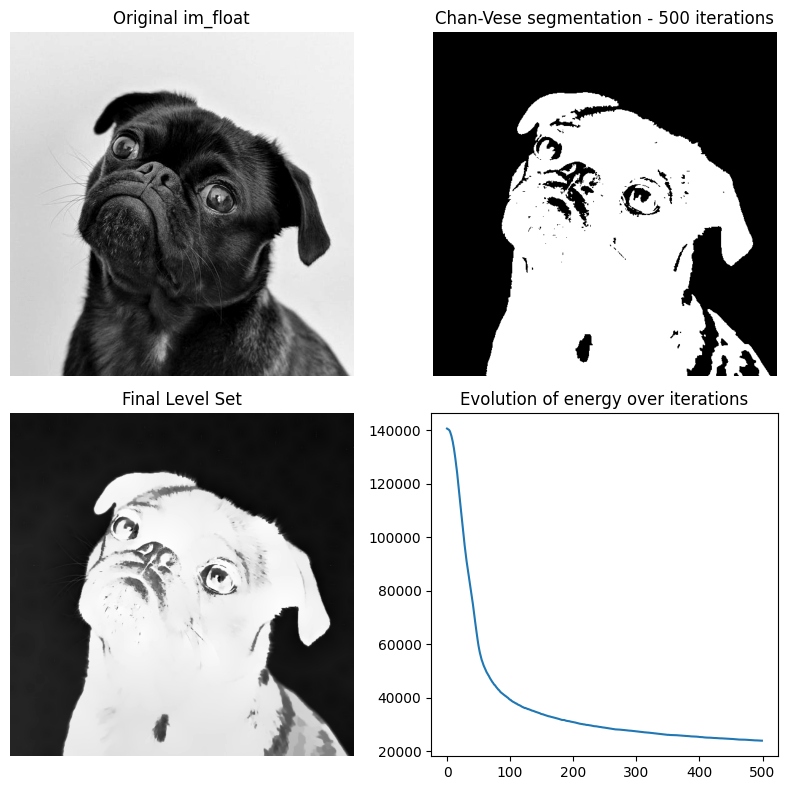

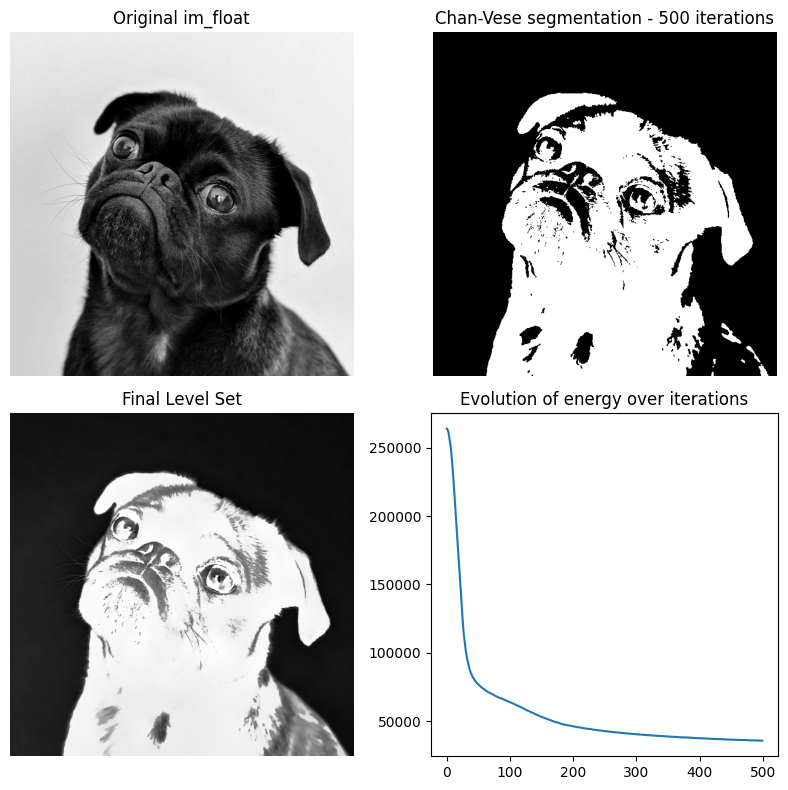

Change lambda2s


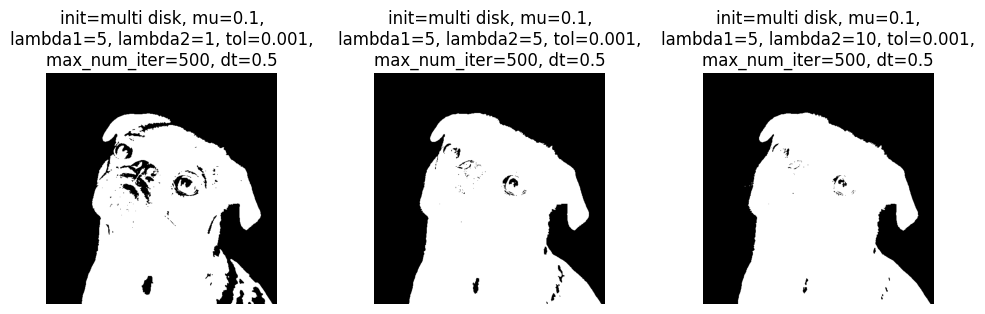

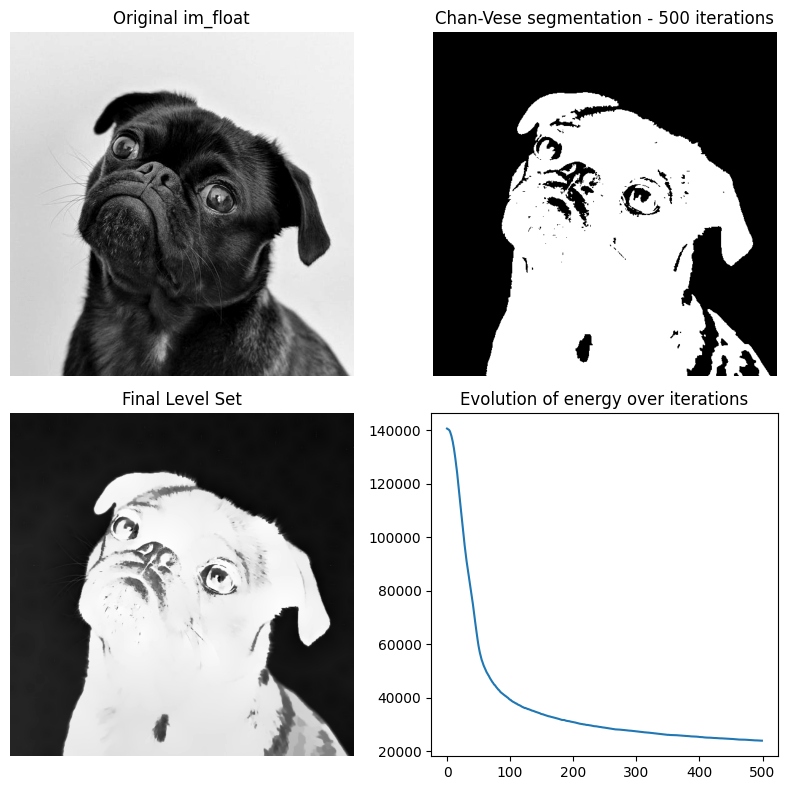

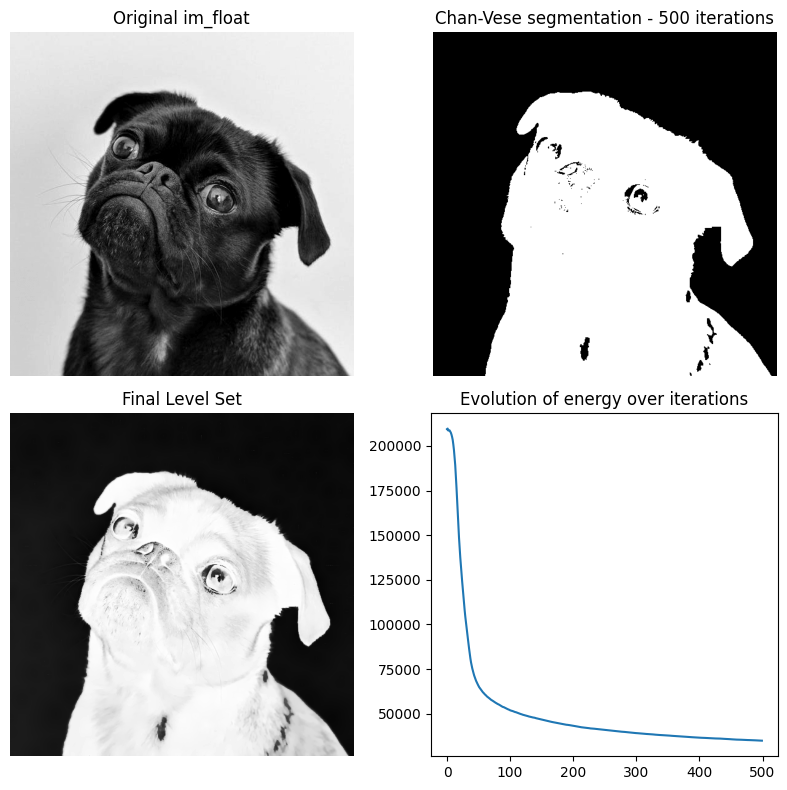

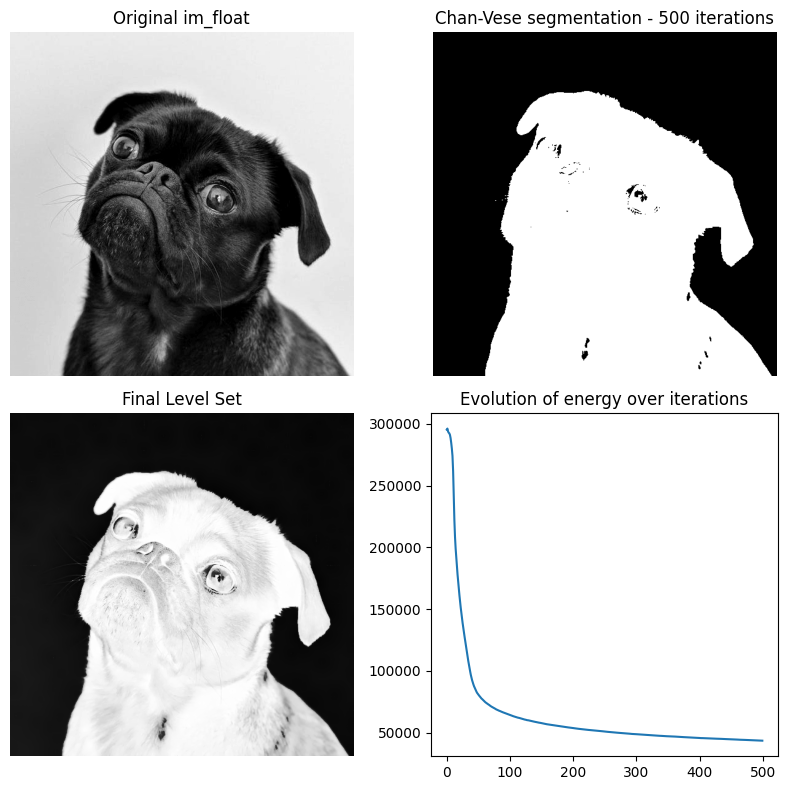

Change mus


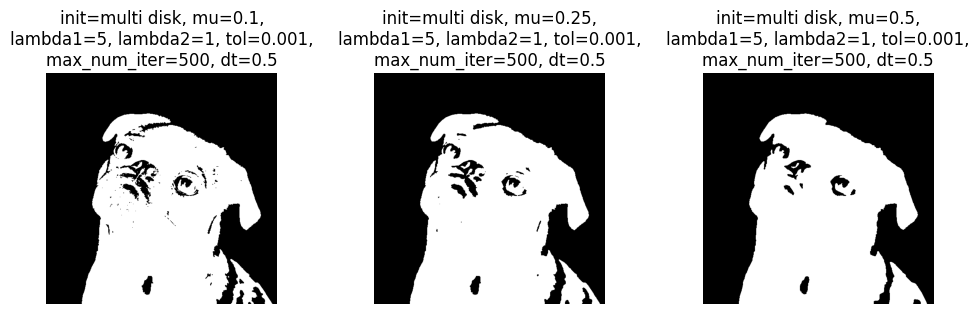

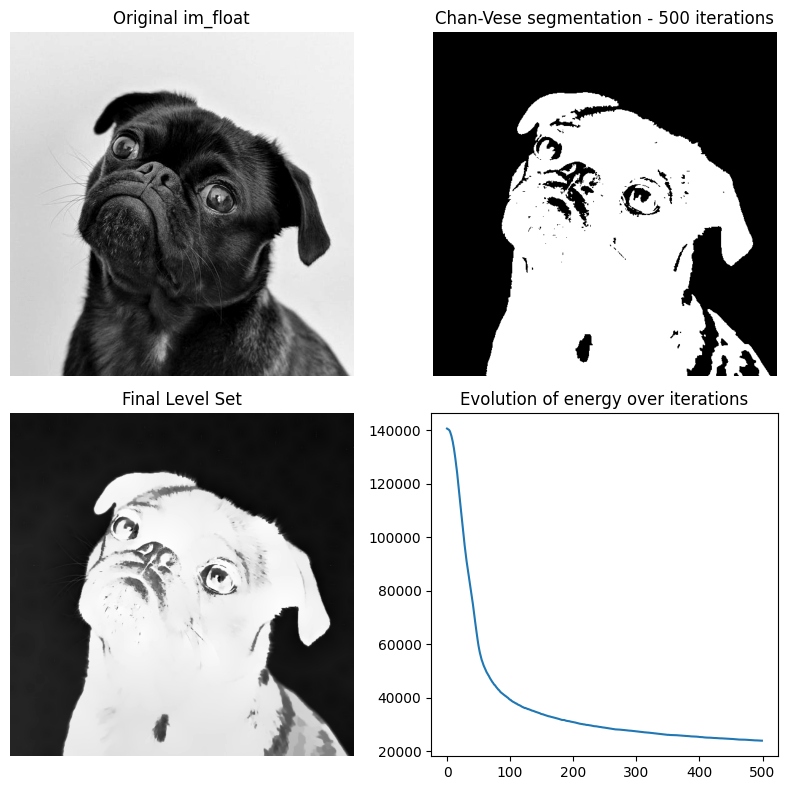

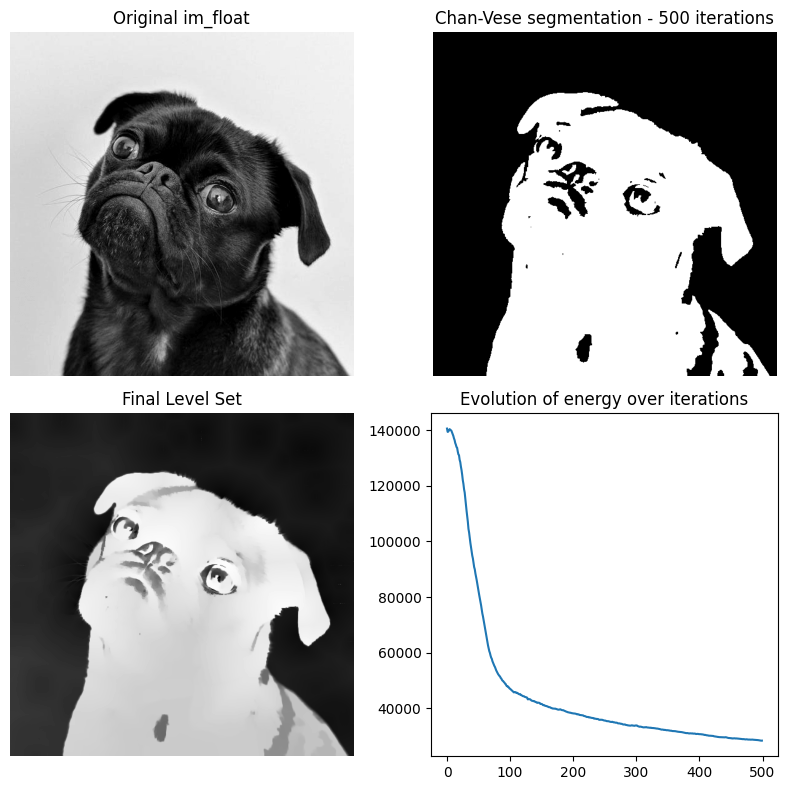

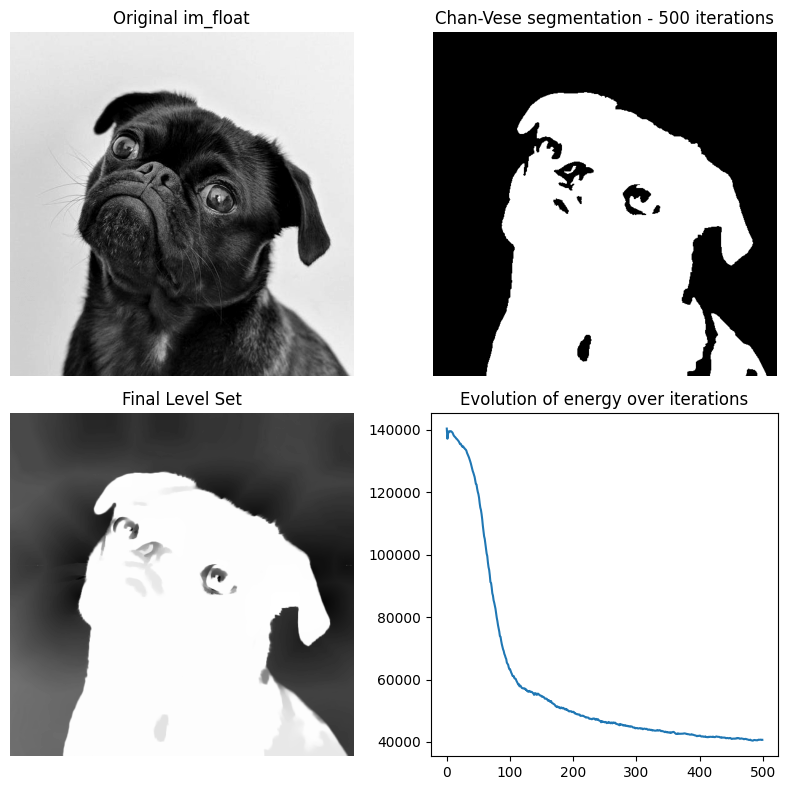

Change max_num_iters


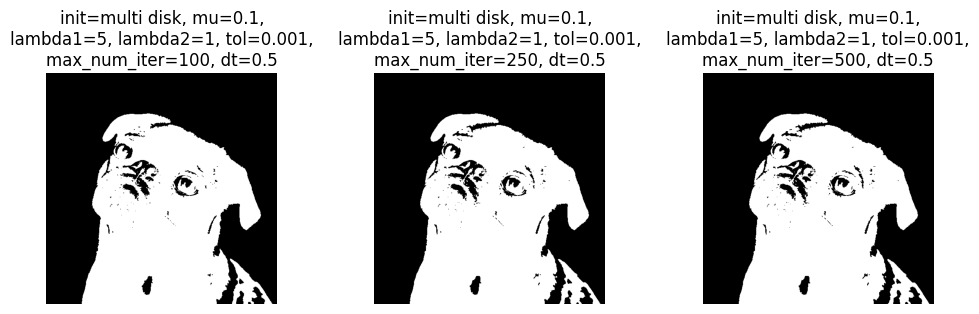

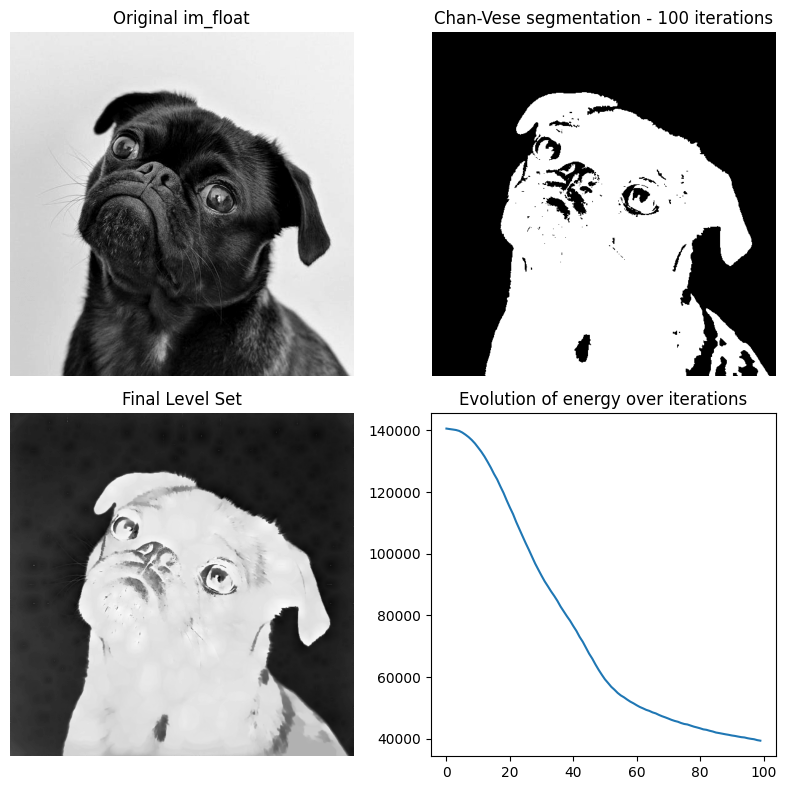

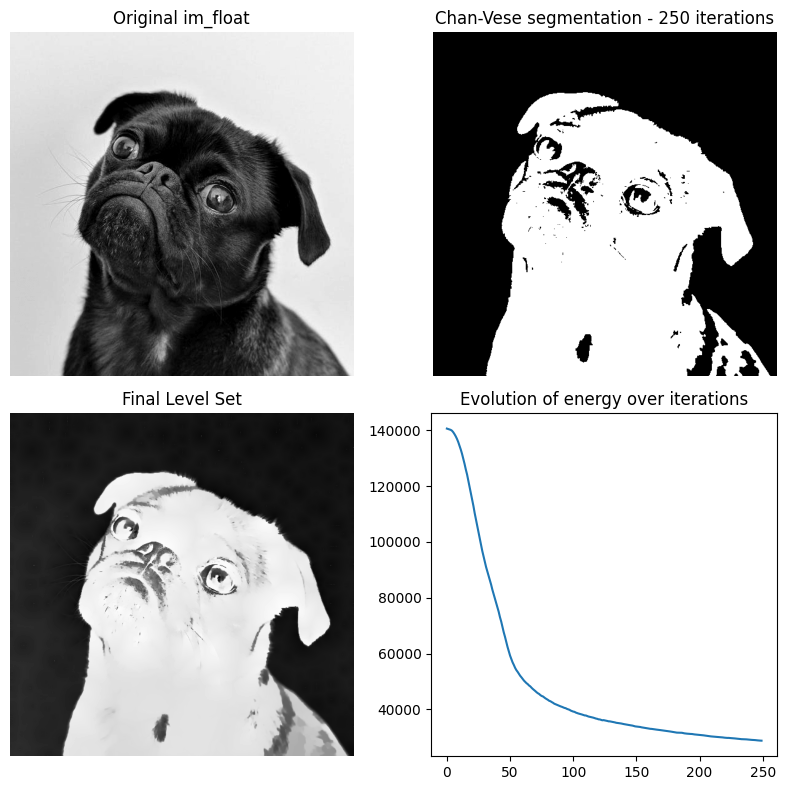

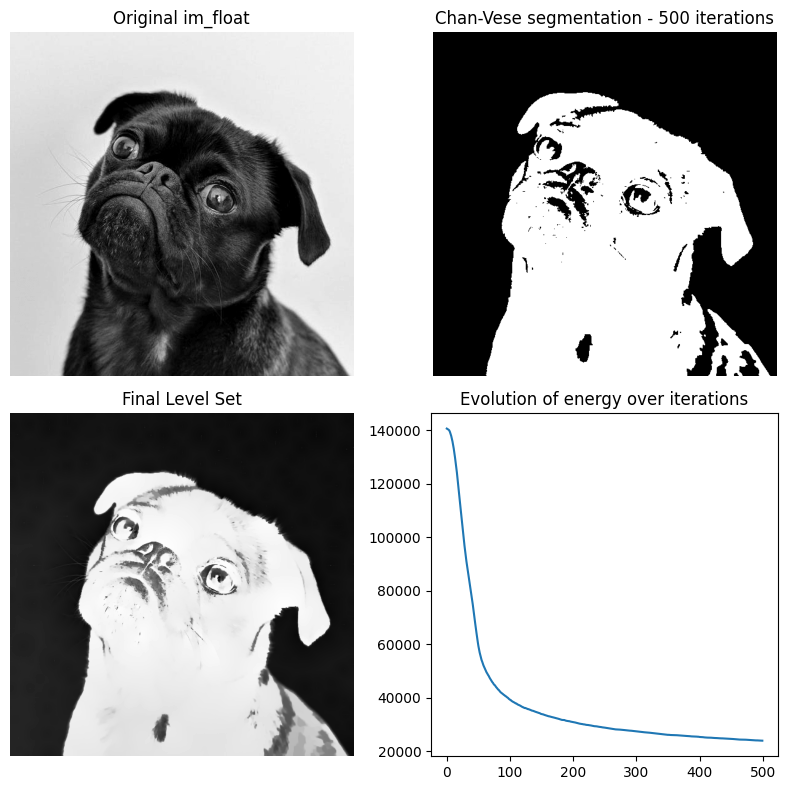

Change dts


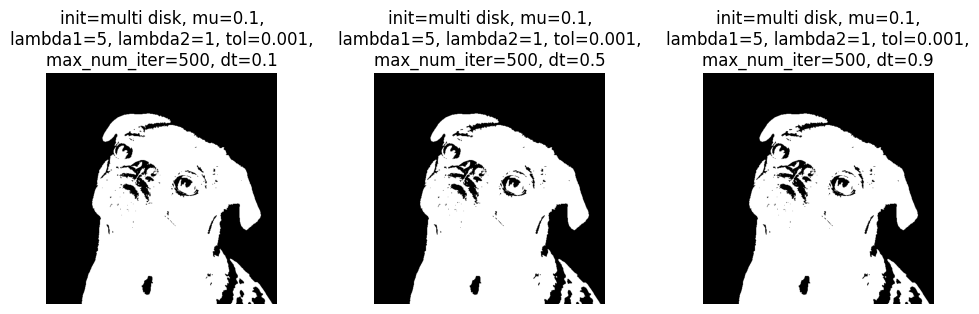

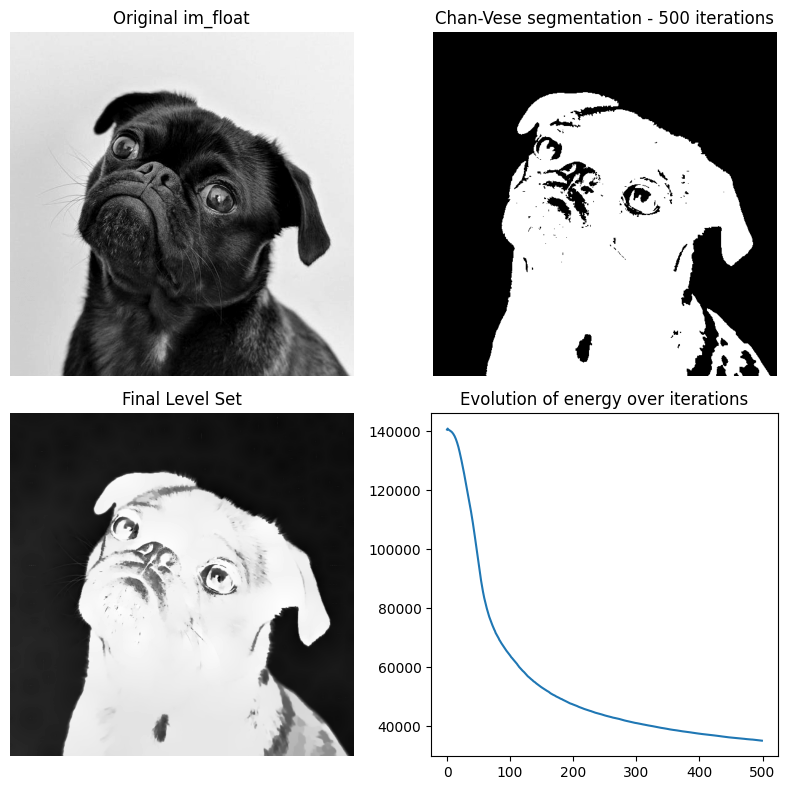

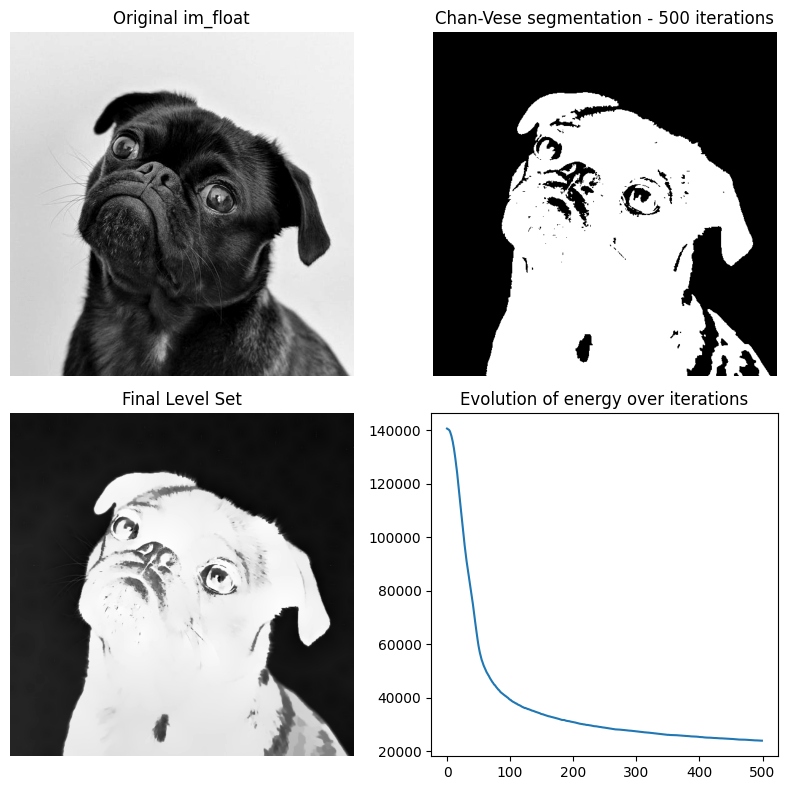

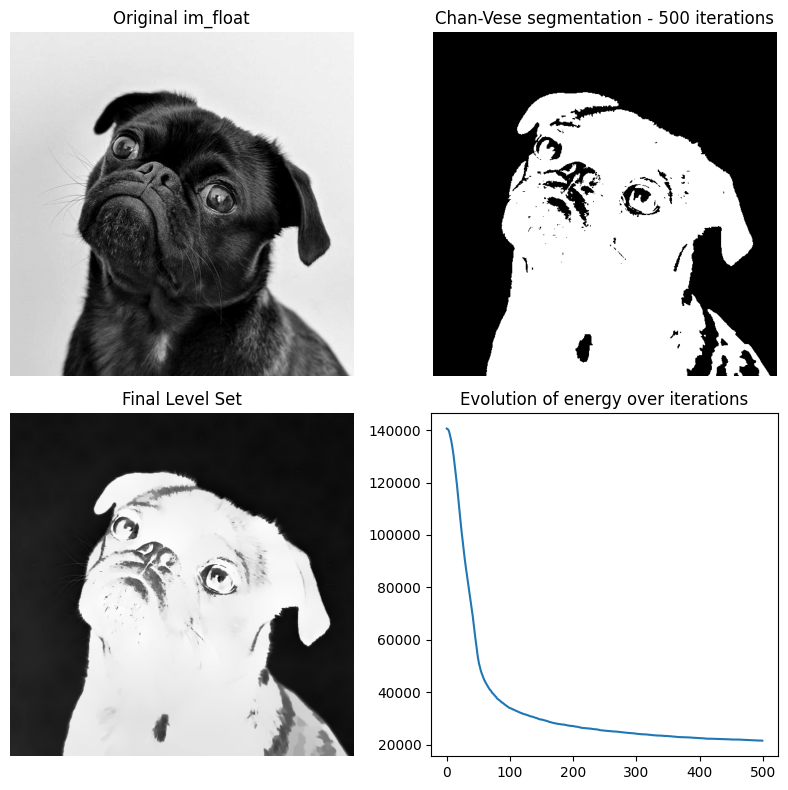

In [347]:
# Change lambda1s -> best value: 5
print("Change lambda1s")
segm_level_set_varPar(image, inits=["multi disk"], mus=[0.1], lambda1s=[1, 5, 10], lambda2s=[1], tols=[0.001], max_num_iters=[500], dts=[0.5])

# Change lambda2s -> best value: 1
print("Change lambda2s")
segm_level_set_varPar(image, inits=["multi disk"], mus=[0.1], lambda1s=[5], lambda2s=[1, 5, 10], tols=[0.001], max_num_iters=[500], dts=[0.5])

# Change mus -> best value: 0.1
print("Change mus")
segm_level_set_varPar(image, inits=["multi disk"], mus=[0.1, 0.25, 0.5], lambda1s=[5], lambda2s=[1], tols=[0.001], max_num_iters=[500], dts=[0.5])

# Change max_num_iters -> best value: 500
print("Change max_num_iters")
segm_level_set_varPar(image, inits=["multi disk"], mus=[0.1], lambda1s=[5], lambda2s=[1], tols=[0.001], max_num_iters=[100, 250, 500], dts=[0.5])

# Change dts -> best value: 0.5
print("Change dts")
segm_level_set_varPar(image, inits=["multi disk"], mus=[0.1], lambda1s=[5], lambda2s=[1], tols=[0.001], max_num_iters=[500], dts=[0.1, 0.5, 0.9])
